In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [ ]:
# Setting up plotting parameters for academic paper styles
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Arial', 'DejaVu Sans Mono', 'Times New Roman', 'DejaVu Serif'],
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})


In [ ]:
# Reading Excel files
file_path = 'kinodynamic_sorted.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'  # Replace with your worksheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

print(data)

    Unnamed: 0   MASS         N           XY          Z
0        False  0.550  3.600000  1383.699911  69.157322
1         True  0.600  2.208631   114.660070   8.345937
2        False  0.680  3.000000   171.430000  17.420000
3        False  0.750  4.200000  1467.005343  73.320927
4        False  0.850  3.200000  1052.727894  52.615340
5         True  0.895  3.280000   107.870000  14.130000
6         True  0.900  2.978820   139.175082  10.449247
7        False  0.980  4.580000  1083.330000  57.660000
8         True  1.000  6.034659   227.310721  13.907975
9        False  1.050  3.500000   950.697789  47.515875
10       False  1.200  4.000000  1164.786743  58.216041
11        True  1.200  1.359157    84.565197   7.192825
12        True  1.400  2.439202    94.131476   6.041106
13       False  1.500  3.800000   931.077212  46.535239
14        True  1.500  1.807679    85.760943   5.645744
15       False  1.800  3.800000   969.336590  48.447443
16        True  1.800  2.299241   127.783558   7

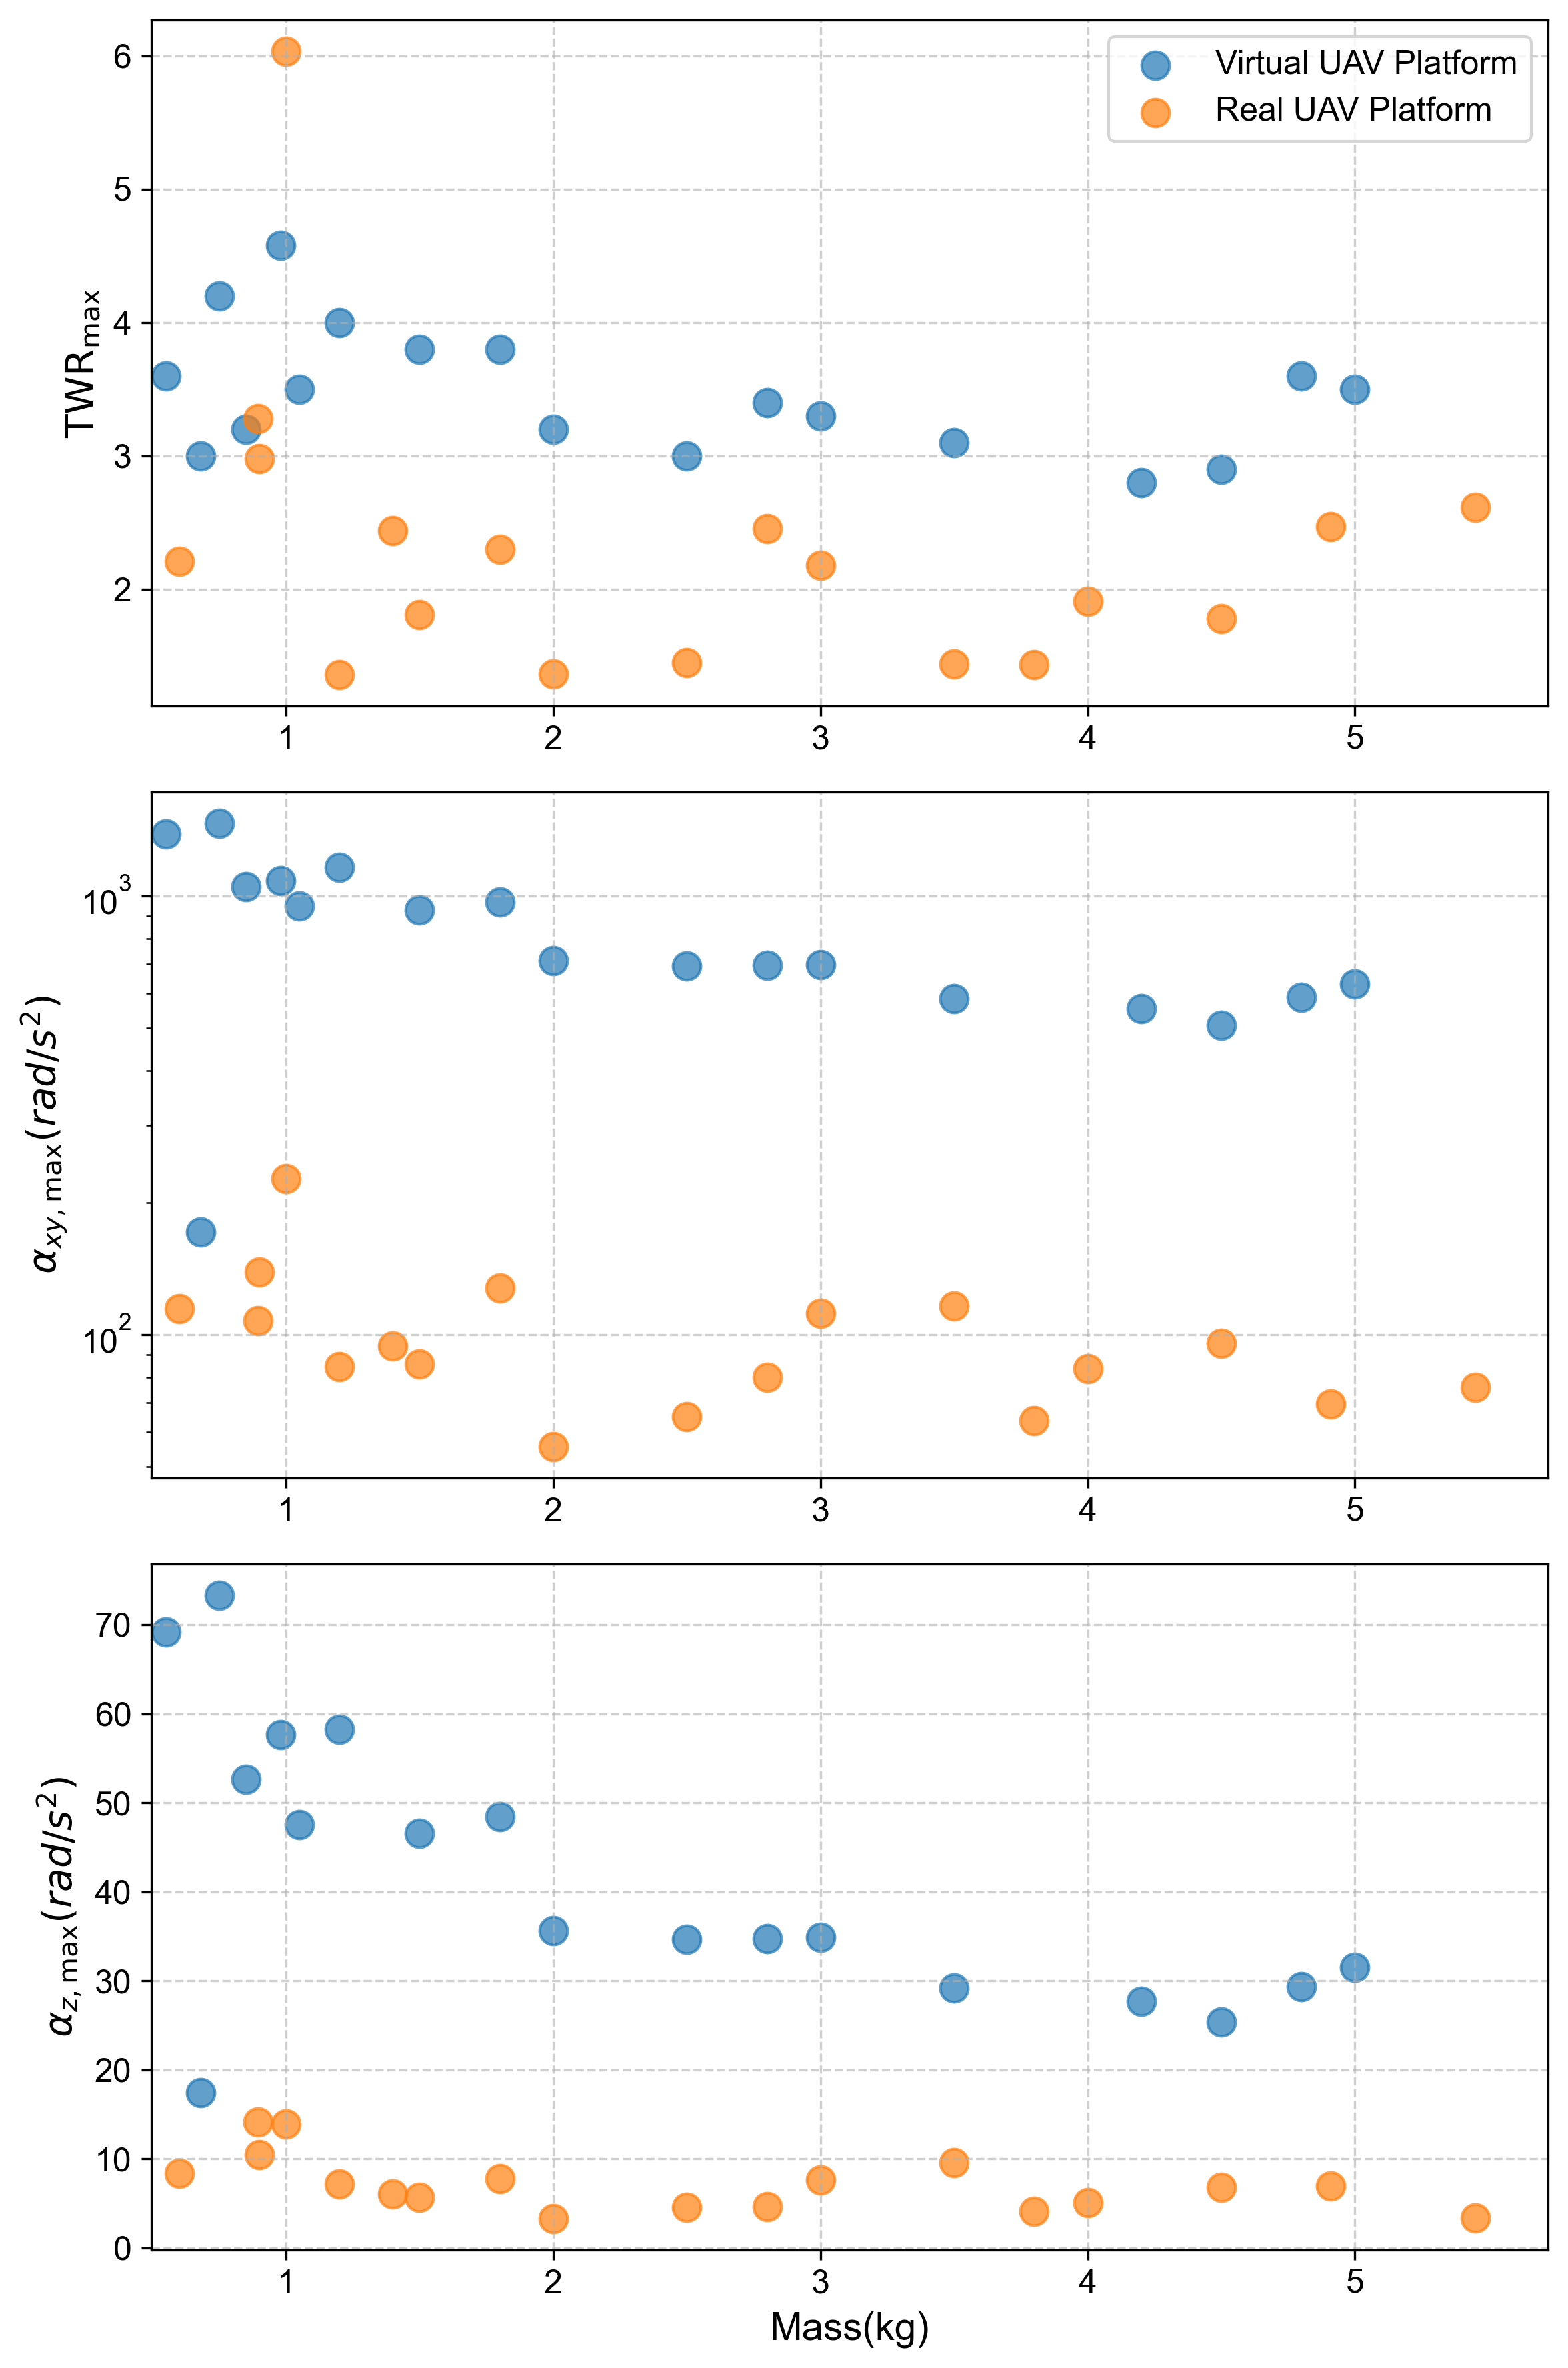

In [ ]:
data = data.rename(columns={'Unnamed: 0': 'Category'})

# Creating Category Tags
category_labels = {True: 'Real UAV Platform', False: 'Virtual UAV Platform'}

# Creating a colour map
colors = ['#1f77b4', '#ff7f0e']

# Defining parameters and labels
y_columns = ['N', 'XY', 'Z']
y_labels = [r'$\mathrm{TWR}_{\max}$', r'$\alpha_{xy,\max}(rad/s^2)$', r'$\alpha_{z,\max}(rad/s^2)$']
file_names = ['TWR_vs_mass', 'alpha_xy_vs_mass', 'alpha_z_vs_mass']

# Create separate charts for each parameter
for i, (y_col, y_label, file_name) in enumerate(zip(y_columns, y_labels, file_names)):
    # Creating new graphics
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # Plot the two types of data separately
    for j, category in enumerate([False, True]):
        mask = data['Category'] == category
        ax.scatter(data.loc[mask, 'MASS'], data.loc[mask, y_col], 
                  c=colors[j], label=category_labels[category], alpha=0.7, s=100)
    
    ax.set_xlabel('Mass(kg)')
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Adjustment of axes according to data range
    ax.set_xlim(data['MASS'].min()*0.9, data['MASS'].max()*1.05)
 
    # Use a logarithmic scale for the XY parameter
    if y_col == 'XY':
        ax.set_yscale('log')
    
    ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=False)
    
    plt.tight_layout()
    
    plt.savefig(f'{file_name}.png', dpi=600)
    plt.savefig(f'{file_name}.pdf', dpi=800)

    plt.close(fig)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

for i, (ax, y_col, y_label) in enumerate(zip(axes, y_columns, y_labels)):
    for j, category in enumerate([False, True]):
        mask = data['Category'] == category
        ax.scatter(data.loc[mask, 'MASS'], data.loc[mask, y_col], 
                  c=colors[j], label=category_labels[category], alpha=0.7, s=100)
    
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    ax.set_xlim(data['MASS'].min()*0.9, data['MASS'].max()*1.05)
 
    if y_col == 'XY':
        ax.set_yscale('log')
    
    if i == 2:
        ax.set_xlabel('Mass(kg)')
    
    if i == 0:
        ax.legend(loc='best', frameon=True, fancybox=True, shadow=False)

plt.tight_layout()

plt.savefig('kinodynamic_analysis_combined.png', dpi=600)
plt.savefig('kinodynamic_analysis_combined.pdf', dpi=800)

plt.show()